In [11]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [12]:
#SONIA MODI

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

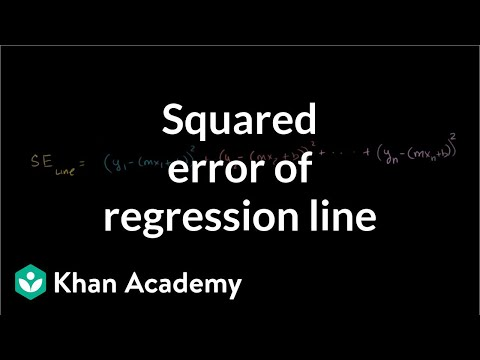

In [13]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

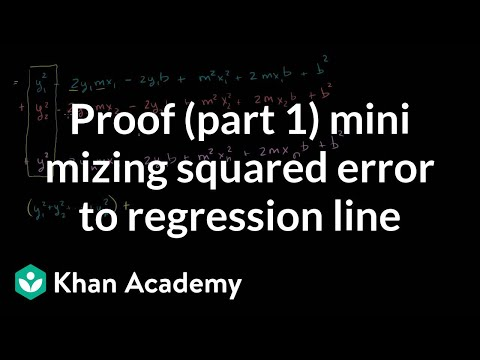

In [14]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

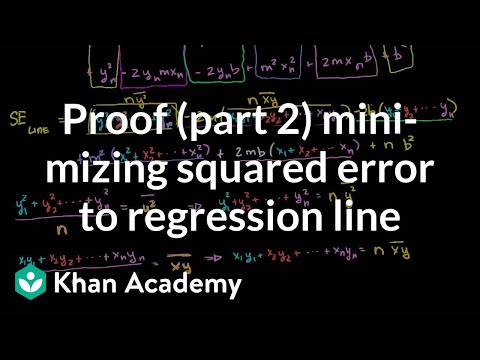

In [15]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

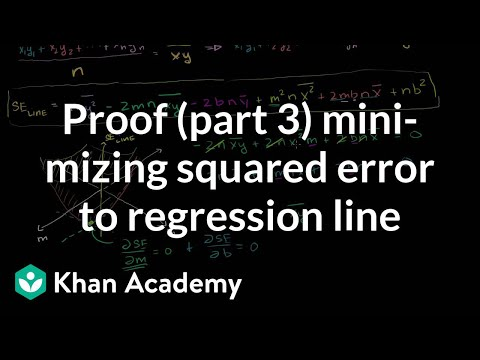

In [16]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

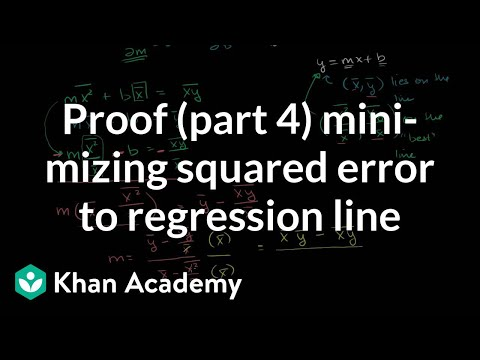

In [17]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

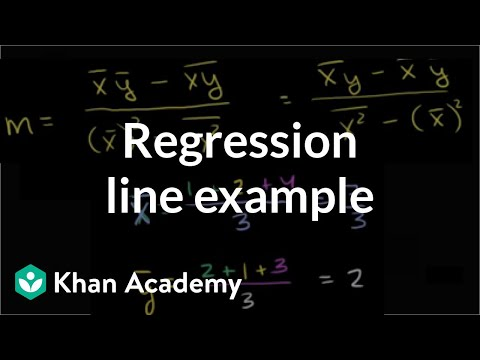

In [18]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

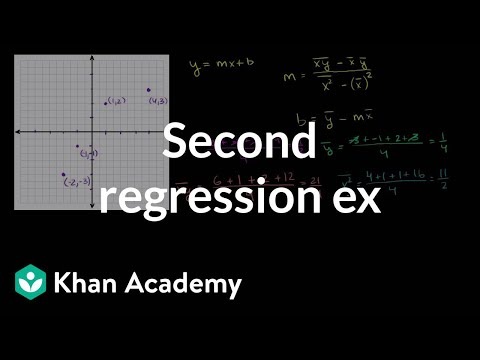

In [19]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


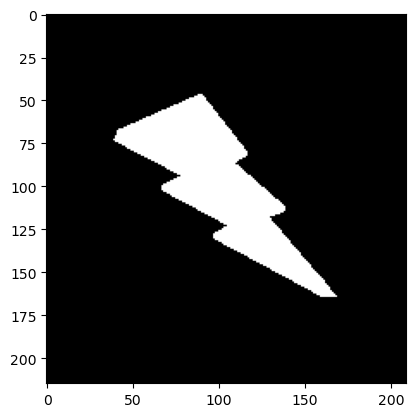

In [22]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');

In [23]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]], shape=(4880, 2))

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [26]:
# TODO
# Your answer here
xs = bolt[:,0]
ys = bolt[:,1]
print(xs)
print(ys)

[ 47  47  47 ... 164 164 164]
[ 88  89  90 ... 166 167 168]


## Question: Why would we want to convert x and y points from int values to floats?

In [ ]:
# TODO
# Your answer here
#that way we can get more precise answers when doing operations like division

In [27]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    
    xs =  points[:,0]#TODO
    ys = points[:,1] #TODO
    x_mean = np.mean(xs) #TODO
    y_mean = np.mean(ys) #TODO

    xy_mean = np.mean(xs*ys) #TODO

    x_squared_mean = np.mean(xs**2) #TODO

    m = (x_mean*y_mean-xy_mean)/(x_mean**2-x_squared_mean) #TODO
    
    b = y_mean-m*x_mean #TODO

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [29]:
def find_inliers(m, b, shape):
    h,w = shape
    x1 = 0
    x2 = w-1
    y1 = m*x1+b
    y2 = m*x2+b
    y1 = np.clip(y1, 0, h - 1)
    y2 = np.clip(y2, 0, h - 1)
    if(y1<=0 or y1>=h-1):
        x1 = (y1-b)/m
    if(y2<=0 or y2>=h-1):
        x2 = (y2-b)/m
    return(x1,x2,y1,y2)
    raise NotImplementedError #TODO

(146, 125)


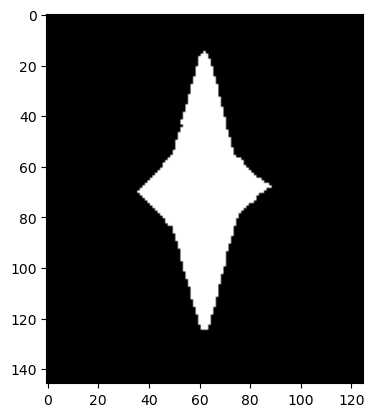

In [30]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [33]:
m,b = calculate_regression(np.argwhere(star))
x1,x2,y1,y2 = find_inliers(m,b, star.shape)

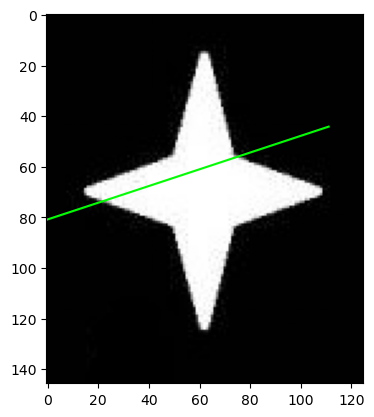

In [38]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray')
regression = Line2D([x1,x2],[y1,y2], color='lime')
ax.add_line(regression)

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

In [36]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

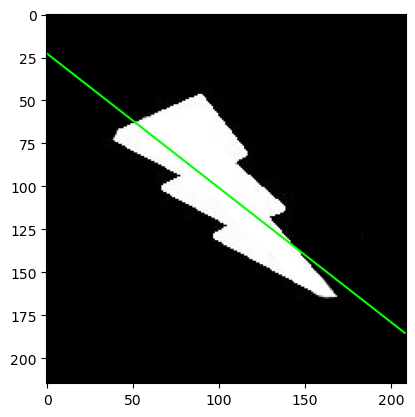

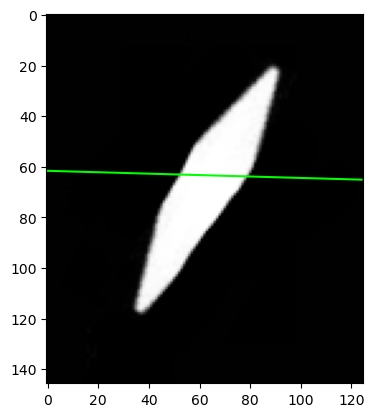

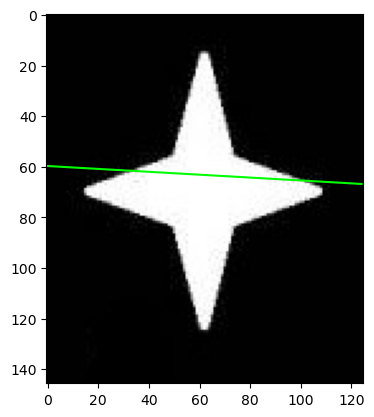

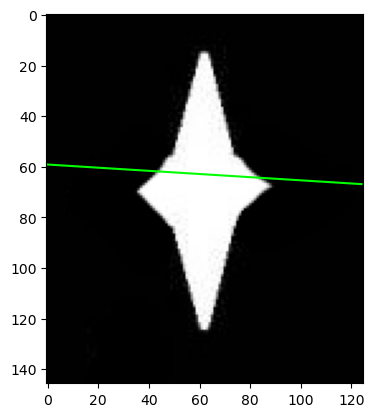

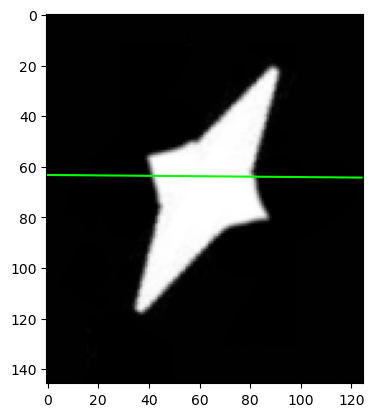

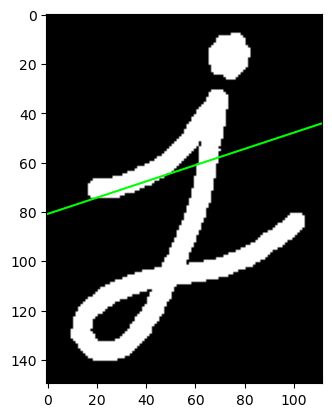

In [39]:
for image in images:
    m,b = calculate_regression(np.argwhere(image))
    x1,x2,y1,y2 = find_inliers(m,b, image.shape)
    fig,ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    regression = Line2D([x1,x2],[y1,y2], color='lime')
    ax.add_line(regression)

## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.